In [1]:
import random

def random_w( p ) : 
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w) : 
    return np.dot(X,w)

def loss(X,w,y) : 
    return hypothesis(X,w) - y

def squared_loss(X,w,y) : 
    return loss(X,w,y)**2

def gradient(X,w,y) : 
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)) : 
        gradients.append(np.sum(loss(X,w,y)*X[:,j])/n)
    return gradients

def update(X,w,y, alpha=0.01) : 
    return [t-alpha*g for t,g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha=0.01, eta=10**-12, iterations=1000) : 
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations) : 
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta) :
            path.append(new_SSL)
            return w, path
        if k%(iterations/20)==0 : 
            path.append(new_SSL)
    return w, path

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston

boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

In [8]:
observations = len(dataset)
X = dataset['RM'].values.reshape((observations,1))
X = np.column_stack((X,np.ones(observations)))
y = dataset['target'].values

In [9]:
alpha = 0.048
w, path = optimize(X,y,alpha, eta=10**-12, iterations=25000)
print("These are out final coefficients : %s" %w)
print("Obtained walking on this path of squared loss %s" %path)

These are out final coefficients : [9.102103659534182, -34.67058692481954]
Obtained walking on this path of squared loss [228778.29425643987, 23959.342083631993, 22509.98207895684, 22167.702711841885, 22086.87036875617, 22067.781085800554, 22063.272980383234, 22062.20835084733, 22061.95692903178, 22061.897553514566, 22061.88353145353, 22061.88022001802, 22061.879437992822, 22061.87925331056, 22061.879209696184, 22061.879199396255, 22061.879196963837, 22061.8791963894, 22061.87919625374, 22061.879196221707, 22061.879196218946]


참고 블로그 : https://bskyvision.com/411

# Page 114

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model
from IPython.display import display

%matplotlib inline

In [12]:
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

dataset.ix -> dataset.iloc

In [18]:
observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:,:-1]
y = dataset['target'].values

In [21]:
display(dataset)
display(X)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          6.72e-135
Time:                        01:04:37   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

타겟 데이터 : 1978년 보스턴 주택 가격  
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)  
특징 데이터  
* CRIM: 범죄율
* INDUS: 비소매상업지역 면적 비율
* NOX: 일산화질소 농도
* RM: 주택당 방 수
* LSTAT: 인구 중 하위 계층 비율
* B: 인구 중 흑인 비율
* PTRATIO: 학생/교사 비율
* ZN: 25,000 평방피트를 초과 거주지역 비율
* CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
* AGE: 1940년 이전에 건축된 주택의 비율
* RAD: 방사형 고속도로까지의 거리
* DIS: 직업센터의 거리
* TAX: 재산세율

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/DisNormal06.svg/330px-DisNormal06.svg.png)  
t : 하나의 독립변수가 종속변수를 설명하는 정도  
P>|t| : 독립변수의 유의확률(살인 용의자가 무죄일 확률),   
보통 0.05보다 작으면 독립변수가 종속변수에 영향을 미치는 것이 유의미함

키워드 : 귀무가설, 대립가설, t값, p값, f값

In [28]:
x = dataset.iloc[:,:-1]
correlation_matrix = X.corr()
print(correlation_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

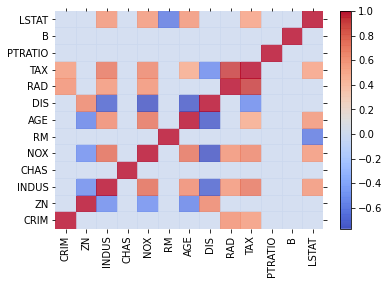

In [37]:
def visualize_correlation_matrix(data, hurdle=0.0):
    R = np.corrcoef(data,rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R,cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0])+0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1])+0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both',
                    bottom='off', top='off', left='off', right='off')
    plt.colorbar()
    plt.show()
    
visualize_correlation_matrix(X, hurdle=0.5)

빨간색 : 강력한 양(+)의 상관  
파란색 : 강력한 음(-)의 상관

In [44]:
corr = np.corrcoef(X, rowvar=0)
eigenvalues, eigenvectors = np.linalg.eig(corr)
print('eigenvalues : %s' %eigenvalues)
print('eigenvectors : %s' %eigenvectors[:,8])
print(variables[2],variables[8],variables[9])

eigenvalues : [6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]
eigenvectors : [-0.0459523   0.08091897  0.25107654 -0.03592171 -0.04363045 -0.0455671
  0.03855068  0.01829854  0.63348972 -0.72023345 -0.02339805  0.00446307
 -0.02443168]
INDUS RAD TAX


# Page 126

originanal -> original  
standardization.std_ -> standardization.var_**.5

In [49]:
from sklearn.preprocessing import StandardScaler

observations = len(dataset)
variables = dataset.columns

standardization = StandardScaler()
Xst = standardization.fit_transform(X)

original_means = standardization.mean_
original_stds = standardization.var_**.5

Xst = np.column_stack((Xst,np.ones(observations)))
y = dataset['target'].values

In [65]:
display(x)
display(pd.DataFrame(Xst))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,1.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,1.0
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.0
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.0
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,1.0
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,1.0
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,1.0
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,1.0


In [60]:
import random

def random_w( p ) : 
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w) : 
    return np.dot(X,w)

def loss(X,w,y) : 
    return hypothesis(X,w) - y

def squared_loss(X,w,y) : 
    return loss(X,w,y)**2

def gradient(X,w,y) : 
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)) : 
        gradients.append(np.sum(loss(X,w,y)*X[:,j])/n)
    return gradients

def update(X,w,y, alpha=0.01) : 
    return [t-alpha*g for t,g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha=0.01, eta=10**-12, iterations=1000) : 
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations) : 
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta) :
            path.append(new_SSL)
            return w, path
        if k%(iterations/20)==0 : 
            path.append(new_SSL)
    return w, path

alpha = 0.02
w, path = optimize(Xst, y, alpha, eta = 10**-12, iterations=20000)
print("These are our final standarized coefficients : " +
      ','.join(map(lambda x : "%0.4f" %x,w)))

These are our final standarized coefficients : -0.9281,1.0816,0.1409,0.6817,-2.0567,2.6742,0.0195,-3.1040,2.6622,-2.0768,-2.0606,0.8493,-3.7436,22.5328


In [66]:
unstandardized_betas = w[:-1] / original_stds
unstandardized_bias = w[-1] - np.sum(
                            (original_means / original_stds) * w[:-1])
print("%8s : %8.4f" % ('bias', unstandardized_bias))
for beta,varname in zip(unstandardized_betas, variables) : 
    print("%8s : %8.4f" % (varname, beta))

    bias :  36.4595
    CRIM :  -0.1080
      ZN :   0.0464
   INDUS :   0.0206
    CHAS :   2.6867
     NOX : -17.7666
      RM :   3.8099
     AGE :   0.0007
     DIS :  -1.4756
     RAD :   0.3060
     TAX :  -0.0123
 PTRATIO :  -0.9527
       B :   0.0093
   LSTAT :  -0.5248


# Page 132

In [70]:
linear_regression = linear_model.LinearRegression(normalize=False,
                                                  fit_intercept=True)

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, linear_regression)

(참고) 메소드 명명규칙 : https://sgoho01.tistory.com/7

In [74]:
# 비 표준화
linear_regression.fit(X,y)
for coef, var in sorted(zip(map(
                        abs,linear_regression.coef_),
                        dataset.columns[:-1]), reverse=True) :
    print("%6.3f %s" %(coef,var))

17.767 NOX
 3.810 RM
 2.687 CHAS
 1.476 DIS
 0.953 PTRATIO
 0.525 LSTAT
 0.306 RAD
 0.108 CRIM
 0.046 ZN
 0.021 INDUS
 0.012 TAX
 0.009 B
 0.001 AGE


In [75]:
# 표준화
Stand_coef_linear_reg.fit(X,y)
for coef, var in sorted(zip(map( \
                        abs, Stand_coef_linear_reg.steps[1][1].coef_),
                        dataset.columns[:-1]), reverse=True) :
    print("%6.3f %s" %(coef,var))

 3.744 LSTAT
 3.104 DIS
 2.674 RM
 2.662 RAD
 2.077 TAX
 2.061 PTRATIO
 2.057 NOX
 1.082 ZN
 0.928 CRIM
 0.849 B
 0.682 CHAS
 0.141 INDUS
 0.019 AGE


# Page 135

In [76]:
from sklearn.metrics import r2_score
linear_regression = linear_model.LinearRegression(normalize=False,
                                                  fit_intercept=True)

def r2_est(X,y) : 
    return r2_score(y,linear_regression.fit(X,y).predict(X))

print("Baseline R2 : %0.3f" %r2_est(X,y))

Baseline R2 : 0.741


In [105]:
r2_impact = list()
for j in range(X.shape[1]) : 
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X,y) - 
                       r2_est(X.values[:,selection],y)),dataset.columns[j]))
for imp, varname in sorted(r2_impact, reverse=True) : 
    print("%6.3f %s" % (imp, varname))

 0.106 RM
 0.064 target
 0.037 LSTAT
 0.016 DIS
 0.016 PTRATIO
 0.012 RAD
 0.012 CRIM
 0.008 NOX
 0.005 TAX
 0.003 CHAS
 0.002 ZN
 0.001 B
 0.001 AGE
 0.000 INDUS


# Page 139

In [81]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

linear_regression = linear_model.LinearRegression(normalize=False,
                                                 fit_intercept=True)
create_interactions = PolynomialFeatures(degree=2,
                                        interaction_only=True,
                                        include_bias=False)

In [85]:
def r2_est(X,y) : 
    return r2_score(y,linear_regression.fit(X,y).predict(X))

baseline = r2_est(X,y)
print("Baseline R2 : %0.3f" %baseline)

Xi = create_interactions.fit_transform(X)
main_effects = create_interactions.n_input_features_

Baseline R2 : 0.741


variables[effects==1] -> variables[:-1][effects==1]

In [103]:
for k,effect in enumerate(create_interactions.powers_[(main_effects):]):
    termA, termB = variables[:-1][effect==1]
    increment = r2_est(Xi[:,list(range(0,main_effects)) 
                      + [main_effects+k]],y) - baseline
    if increment > 0.01 : 
        print('Adding interaction %8s *%8s R2 : %5.3f'
              %(termA, termB, increment))

Adding interaction     CRIM *    CHAS R2 : 0.011
Adding interaction     CRIM *      RM R2 : 0.021
Adding interaction       ZN *      RM R2 : 0.013
Adding interaction    INDUS *      RM R2 : 0.038
Adding interaction    INDUS *     DIS R2 : 0.013
Adding interaction      NOX *      RM R2 : 0.027
Adding interaction       RM *     AGE R2 : 0.024
Adding interaction       RM *     DIS R2 : 0.018
Adding interaction       RM *     RAD R2 : 0.049
Adding interaction       RM *     TAX R2 : 0.054
Adding interaction       RM * PTRATIO R2 : 0.041
Adding interaction       RM *       B R2 : 0.020
Adding interaction       RM *   LSTAT R2 : 0.064


In [104]:
Xi = X
Xi['interaction'] = X['RM']*X['LSTAT']
print('R2 of a model with RM*LSTAT interaction : %0.3f'
      % r2_est(Xi,y))

R2 of a model with RM*LSTAT interaction : 0.805


# Page 143

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

linear_regression = linear_model.LinearRegression(normalize=False,
                                                  fit_intercept=True)
create_cubic = PolynomialFeatures(degree=3,
                                  interaction_only=False,
                                  include_bias=False)
create_quadratic = PolynomialFeatures(degree=2,
                                      interaction_only=False,
                                      include_bias=False)
linear_predictor = make_pipeline(linear_regression)
quadratic_predictor = make_pipeline(create_quadratic, linear_regression)
cubic_predictor = make_pipeline(create_cubic, linear_regression)

np.arange(0,50,0.1).reshape((50/0.1,1))    
-> np.arange(0,50,0.1).reshape((500,1))

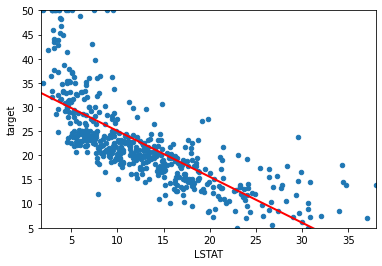

In [127]:
predictor = 'LSTAT'
x = dataset['LSTAT'].values.reshape((observations,1))
xt = np.arange(0,50,0.1).reshape((500,1))
x_range = [dataset[predictor].min(),dataset[predictor].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

scatter = dataset.plot(kind='scatter', x=predictor, y='target',
                      xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt,linear_predictor.fit(x,y).predict(xt),
                        '-', color='red', linewidth=2)
plt.show()

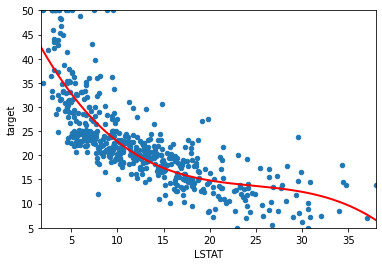

In [128]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target',
                      xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt,cubic_predictor.fit(x,y).predict(xt),
                        '-', color='red', linewidth=2)
plt.show()

In [157]:
for d in [1,2,3,5,15] : 
    create_poly = PolynomialFeatures(degree=d,
                                     interaction_only=False,
                                     include_bias=False)
    poly = make_pipeline(create_poly, StandardScaler(),
                         linear_regression)
    model = poly.fit(x,y)
    print("R2 degree - %2i polynomial :%0.3f"
          %(d,r2_score(y,model.predict(x))))
    
plt.show()

R2 degree -  1 polynomial :0.544
R2 degree -  2 polynomial :0.641
R2 degree -  3 polynomial :0.658
R2 degree -  5 polynomial :0.682
R2 degree - 15 polynomial :0.695


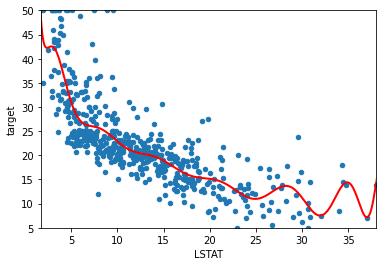

In [158]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target',
                      xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt,model.predict(xt),
                        '-', color='red', linewidth=2)
plt.show()

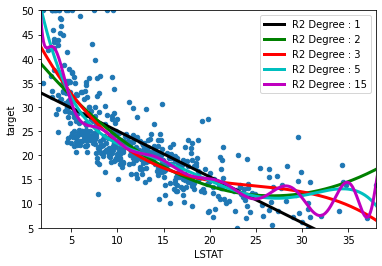

In [162]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target',
                      xlim=x_range, ylim=y_range)

color = iter(['k','g','r','c','m'])

for d in [1,2,3,5,15] : 
    create_poly = PolynomialFeatures(degree=d,
                                     interaction_only=False,
                                     include_bias=False)
    poly = make_pipeline(create_poly, StandardScaler(),
                         linear_regression)
    model = poly.fit(x,y)
    regr_line = scatter.plot(xt,model.predict(xt),
                        '-', color=next(color), linewidth=3,
                        label='R2 Degree : '+str(d) )
    
scatter.legend(loc='best')
plt.show()

## Homework  
1. OLS  
2. Pseudo Inverse  
3. Gradient Descent
4. t값, p값, f값